In [143]:
import os 
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM # type: ignore
from tensorflow.keras.layers import Dense, Dropout, TimeDistributed # type: ignore
from keras.layers import Input, LSTM, Dense
from keras.models import Model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests


In [144]:
names = ['bitcoin', 'bnb', 'cardano', 'chainlink', 'dogecoin', 'ethereum', 'fetch.ai', 'filecoin', 'kucoin', 'litecoin', 'monero', 'oasis network', 'ocean protocol', 'pancakeswap', 'polkadot', 'singularitynet', 'solana', 'tezos', 'uniswap', 'XRP']
coins = ['BTC-USD', 'BNB-USD', 'ADA-USD', 'LINK-USD', 'DOGE-USD', 'ETH-USD', 'FET-USD', 'FIL-USD', 'KCS-USD', 'LTC-USD', 'XMR-USD', 'ROSE-USD', 'OCEAN-USD', 'CAKE-USD', 'DOT-USD', 'AGIX-USD', 'SOL-USD', 'XTZ-USD', 'UNI-USD', 'XRP-USD']
correlations = np.zeros((len(names), 6))


In [164]:
def corr(i, correlations):
    #Read the csv file
    prices_df = pd.read_csv(f"prices/{coins[i]}.csv")
    trends_df = pd.read_csv(f"trends/{names[i]}.csv")

    df, train_dates = create_df(trends_df, prices_df)
    for j in range(1,7):
        variable = df.columns[j]
        correlation = df[variable].corr(df['Trends'])
        correlations[i,j-1] = correlation
    return correlations

def plotting(i, variable):
    prices_df = pd.read_csv(f"prices/{coins[i]}.csv")
    trends_df = pd.read_csv(f"trends/{names[i]}.csv")
        # Create a figure and subplots
    fig, axs = plt.subplots(2, 1, figsize=(6, 6))
    df, train_dates = create_df(trends_df, prices_df)

    # Plot 'Trends' over time
    axs[0].plot(train_dates, df['Trends'], label='Trends', color='red')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Trends')
    axs[0].set_title('Trends Over Time')
    axs[0].legend()

    # Plot 'Open' over time
    axs[1].plot(train_dates, df[variable], label=f"{variable}", color='blue')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel(f"{variable}")
    axs[1].set_title(f"{variable} over time")
    axs[1].legend()

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f"{names[i]}.png") 
    plt.close()
    return f"{names} correctly plotted"

In [166]:
for i in range(0, len(names)):
    plotting(i,'High')

In [154]:
correlations_df = pd.DataFrame(correlations)

correlations_df.columns = ['Correlation with Open',	'Correlation with High',	'Correlation with Low',	'Correlation with Close',	'Correlation with Adj Close',	'Correlation with Volume']
correlations_df.insert(0, 'Names', names)
correlations_df.set_index('Names', inplace=True)

correlations_df.to_excel('correlations.xlsx', index = True)

In [148]:
def create_df(trends_df, prices_df):
    # Clean trends_df
    trends_df.reset_index(drop=False, inplace=True)
    trends_df.columns = trends_df.iloc[0]
    trends_df = trends_df[1:][:]
    trends_df.columns = ['Week', 'Trends']

    # Create 'Trends' column in prices_df
    prices_df['Trends'] = 0
    # Convert 'Date' into datetime
    prices_df['Date'] = pd.to_datetime(prices_df['Date'])
    trends_df['Week'] = pd.to_datetime(trends_df['Week'])

    # Look for the latest start date
    start_date = trends_df['Week'].iloc[0]
    if(prices_df['Date'].iloc[0] > trends_df['Week'].iloc[0]):
        start_date = prices_df['Date'].iloc[0]
    prices_df = prices_df[prices_df['Date']>=start_date]

    # Interpolate Trends
    days = len(prices_df)
    weeks = days//7
    modulo = days % 7 

    prices_df.reset_index(inplace=True, drop=True)
    trends_df.reset_index(inplace=True, drop=True)

    for i in range(0, weeks):
        for j in range(0,7):
            try:
                prices_df.loc[i*7+j, 'Trends'] = int(trends_df.loc[i, 'Trends'])
            except ValueError:
                prices_df.loc[i*7+j, 'Trends'] = 0
    for k in range(weeks*7, days):
        try:
            prices_df.loc[k, 'Trends'] = int(trends_df.loc[trends_df.index[-1], 'Trends'])
        except ValueError:
            prices_df.loc[k, 'Trends'] = 0

    df = prices_df
    train_dates = pd.to_datetime(prices_df['Date'])
    return df, train_dates



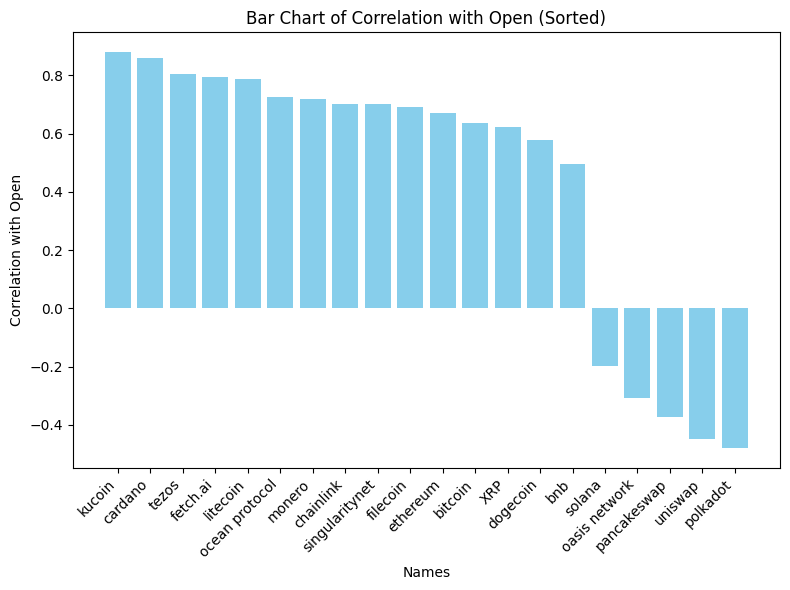

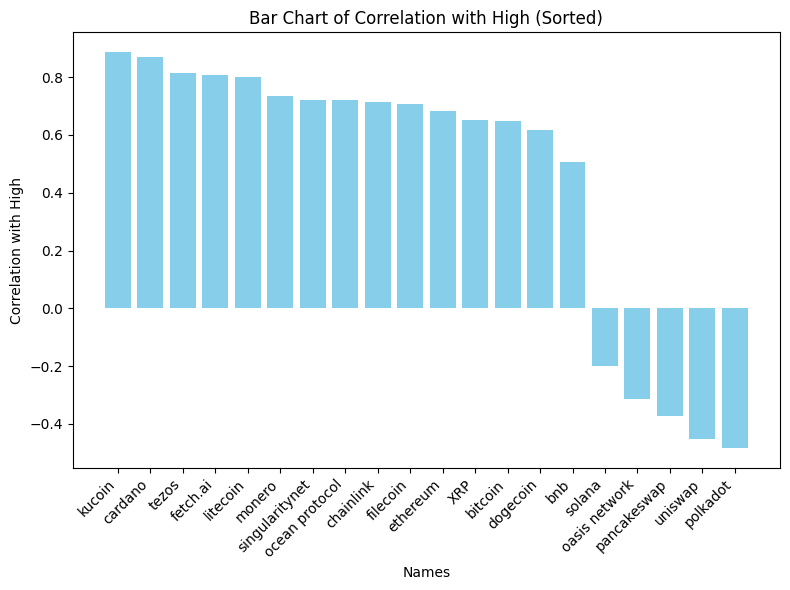

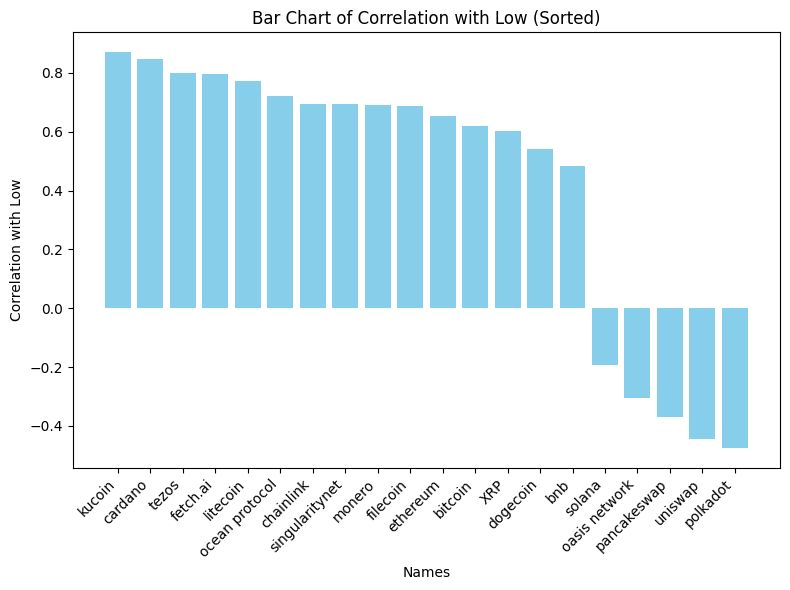

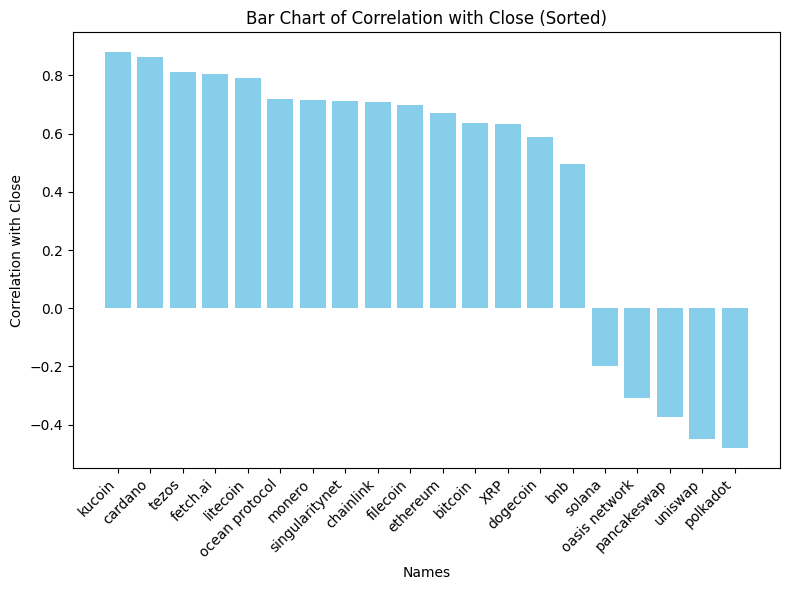

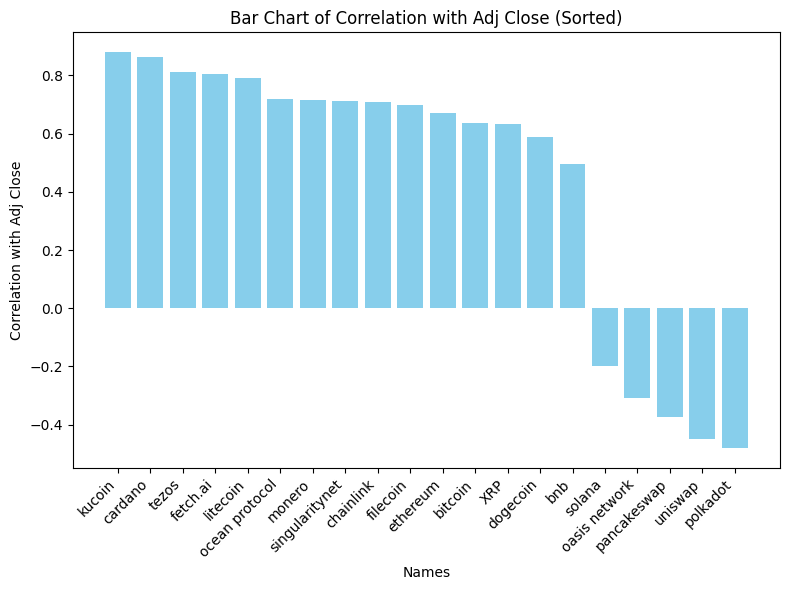

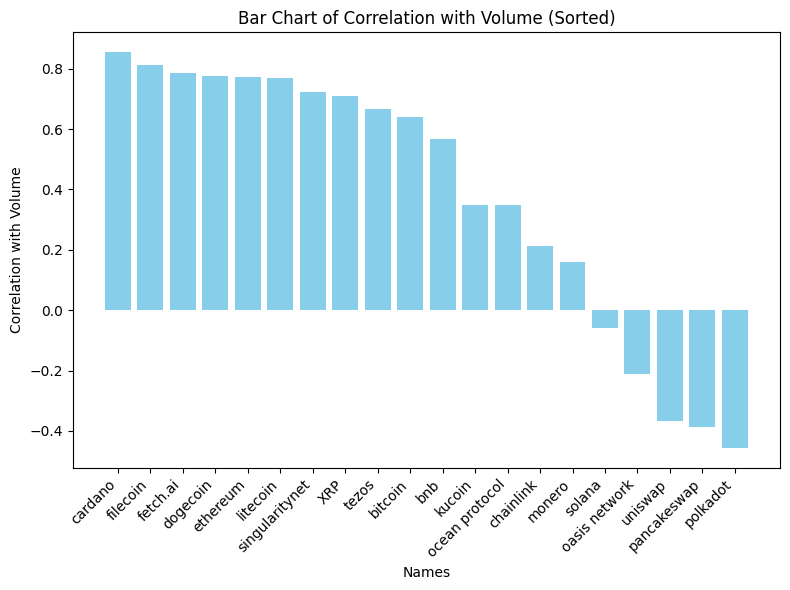

In [151]:

# Plot each column as a bar chart
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Sort the DataFrame by the column being plotted
    sorted_correlations_df = correlations_df.sort_values(by=column, ascending=False)
    
    # Plot the sorted DataFrame
    plt.bar(sorted_correlations_df.index, sorted_correlations_df[column], color='skyblue')
    
    plt.xlabel('Names')
    plt.ylabel(column)
    plt.title(f'Bar Chart of {column} (Sorted)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{column}_sorted.png") 


In [158]:
pd.DataFrame(correlations)

,0,1,2,3,4,5
0,0.637778,0.646690,0.620866,0.635631,0.635631,0.640774
1,0.495886,0.505513,0.482306,0.495477,0.495477,0.568873
2,0.860267,0.871018,0.847814,0.863188,0.863188,0.855043
3,0.702655,0.713507,0.694674,0.708863,0.708863,0.213458
4,0.577540,0.615334,0.541046,0.587946,0.587946,0.776371
5,0.670083,0.681425,0.653685,0.669995,0.669995,0.772414
6,0.792636,0.807348,0.794774,0.806100,0.806100,0.785048
7,0.690122,0.706208,0.688717,0.699783,0.699783,0.814000
8,0.879520,0.886484,0.870791,0.880179,0.880179,0.349015
9,0.787820,0.799362,0.773355,0.790672,0.790672,0.770563


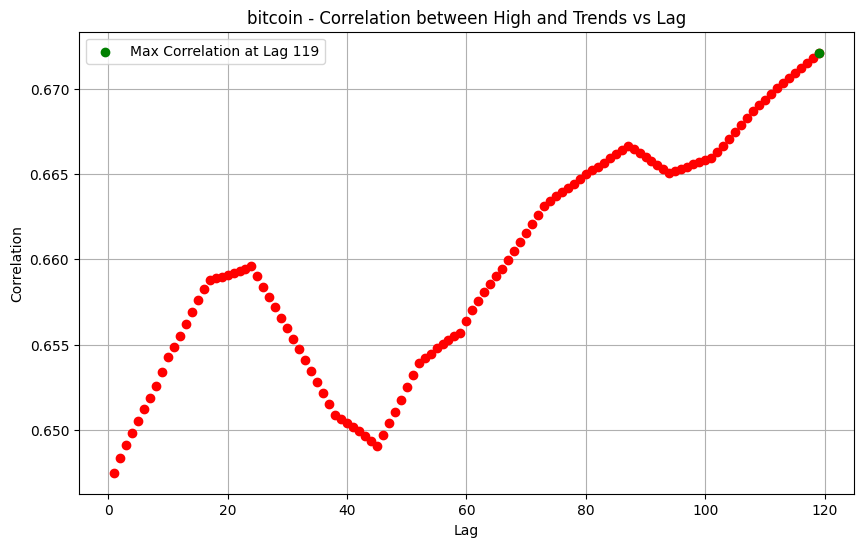

In [205]:
import matplotlib.pyplot as plt

i=0
prices_df = pd.read_csv(f"prices/{coins[i]}.csv")
trends_df = pd.read_csv(f"trends/{names[i]}.csv")
df, train_dates = create_df(trends_df, prices_df)

column1 = 'High'  # Replace with the name of the first column
column2 = 'Trends'  # Replace with the name of the second column

# Initialize lists to store lag values and corresponding correlation coefficients
lags = []
correlations = []

# Iterate over lag values from 1 to 100
for lag in range(1, 120):
    # Shift the columns by the lag value to create lagged values
    lagged_df = df[[column1, column2]].shift(periods=lag)
    
    # Perform correlation matrix on lagged values
    correlation_matrix_lagged = lagged_df.corr()
    
    # Get the correlation coefficient between the two columns
    correlation_value = correlation_matrix_lagged.loc[column1, column2]
    
    # Append lag and correlation coefficient to lists
    lags.append(lag)
    correlations.append(correlation_value)

# Plot lag vs correlation
plt.figure(figsize=(10, 6))
for lag, corr in zip(lags, correlations):
    color = 'red' if corr > 0 else 'blue'
    plt.plot(lag, corr, marker='o', color=color)

max_corr_index = correlations.index(max(correlations))
max_corr_lag = lags[max_corr_index]

plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title(f"{names[i]} - Correlation between {column1} and {column2} vs Lag")
plt.grid(True)

# Find the index where the correlation crosses the 0 axis
index_cross_zero = next((i for i, corr in enumerate(correlations) if corr > 0 and correlations[i-1] <= 0), None)
if index_cross_zero is not None:
    lag_cross_zero = lags[index_cross_zero]
    plt.axvline(x=lag_cross_zero, color='green', linestyle='--', label=f'Crosses Zero at Lag {lag_cross_zero}')

plt.scatter(max_corr_lag, max(correlations), color='green', label=f'Max Correlation at Lag {max_corr_lag}', zorder=5)
plt.legend()
plt.show()
